# Aggregations

To translate into rough SQL terms:

>SELECT COUNT(color) 

>FROM table

>GROUP BY color 


- COUNT(color) is equivalent to a metric.
- GROUP BY color is equivalent to a bucket.


## 1. Metric
Aggregations that keep track and compute metrics over a set of documents.
## 2. Matrix
Operate on multiple fields and produce a matrix result based on the values extracted from the requested document fields. No support of scripting.
## 3. Pipeline
Aggregations that aggregate the output of other aggregations and their associated metrics


## 4. Bucketing
Each bucket is associated with a key and a document criterion. When the aggregation is executed, all the buckets criteria are evaluated on every document in the context and when a criterion matches, the document is considered to "fall in" the relevant bucket. By the end of the aggregation process, we’ll end up with a list of buckets - each one with a set of documents that "belong" to it.

>Bucketing aggregations can have sub-aggregations (bucketing or metric). The sub-aggregations will be computed for the buckets which their parent aggregation generates. 


## Examples of Bucket Aggregation
- Date Histogram Aggregation
- Date Range Aggregation
- Filter(s) Aggregation
- Geo Distance Aggregation
- Histogram Aggregation
- Missing Aggregation
- Nested Aggregation
- Range Aggregation
- Reverse nested Aggregation
- Sampler Aggregation
- Significant Terms Aggregation
- Terms Aggregation

In [5]:
import requests
from faker import Faker
from faker import Factory
import ujson as json
import pandas as pd
import requests
import certifi
from numpy import random 
from elasticsearch import Elasticsearch
from elasticsearch import helpers
from elasticsearch_dsl import Search, DocType, Date, Integer, Keyword, Text
from datetime import datetime
from elasticsearch_dsl.connections import connections
import pandas as pd
import requests
from random import randint
from datetime import datetime, timedelta
import math
import numpy as np
#!pip install pandasticsearch
from pandas.io.json import json_normalize
from pandasticsearch import DataFrame
from pandasticsearch import Select
from matplotlib import pyplot as plt
import seaborn as sns

ES_HOST = 'http://team.ankit.one'
INDEX = "eda_small"
DOC_TYPE="user"
es = Elasticsearch(ES_HOST)



## Aggregation Format

```
"aggregations" : {
    "<aggregation_name>" : {
        "<aggregation_type>" : {
            <aggregation_body>
        }
        [,"meta" : {  [<meta_data_body>] } ]?
        [,"aggregations" : { [<sub_aggregation>]+ } ]?
    }
    [,"<aggregation_name_2>" : { ... } ]*
}
```


### Metrics Aggregation
Some aggregations output a single numeric metric (e.g. avg) and are called single-value numeric metrics aggregation, others generate multiple metrics (e.g. stats) and are called multi-value numeric metrics aggregation

In [9]:
query = {
            "from" : 0, 
            "size" : 5000,
            "query": {
                        "match_all": {}
                     }
            }
result_dict = es.search(index=INDEX, body=query)
df = Select.from_dict(result_dict).to_pandas()
df = df.set_index(['_id'])
df.drop(['_index', '_score', '_type'],inplace=True,axis=1,errors='ignore')


In [11]:
df.head()

,Avg Order Value,City,days_since_last_purchase,discount_percentage,email_unsubscribe,f_score,lifecycle,m_score,name,num_of_orders,r_score,revenue,rfm_score,segments,total_discount_revenue
_id,,,,,,,,,,,,,,,
199e45e7-d14b-5633-b711-ab327612dc04,0.0,Mumbai,91,25,False,0,Contact,0,Kathryn Martin,0,3,0,3,[],0.0
4f8b3348-0fcb-e402-57f0-32b6a323d6fc,0.0,Noida,53,27,False,0,Contact,0,Patricia Green,0,5,0,5,"[NCR, High Discount Seeker]",0.0
14708bac-41d2-b9b0-15dd-ac236751e157,0.0,Vadodara,33,25,False,0,Contact,0,Carlos Nguyen,0,6,0,6,[],0.0
4d51c096-0ddc-cd66-2d35-1bed44752ece,0.0,Ahmedabad,24,27,False,0,Contact,0,Jennifer King,0,7,0,7,[High Discount Seeker],0.0
0f53503b-df12-8723-7d50-5f83abd9d425,0.0,Pune,1,20,False,0,Contact,0,Samantha Scott,0,9,0,9,[],0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3224 entries, 199e45e7-d14b-5633-b711-ab327612dc04 to 5698730d-ffb0-1dd1-2dc9-7bb18af081b3
Data columns (total 15 columns):
Avg Order Value             3224 non-null float64
City                        3224 non-null object
days_since_last_purchase    3224 non-null int64
discount_percentage         3224 non-null int64
email_unsubscribe           3224 non-null bool
f_score                     3224 non-null int64
lifecycle                   3224 non-null object
m_score                     3224 non-null int64
name                        3224 non-null object
num_of_orders               3224 non-null int64
r_score                     3224 non-null int64
revenue                     3224 non-null int64
rfm_score                   3224 non-null int64
segments                    3224 non-null object
total_discount_revenue      3224 non-null float64
dtypes: bool(1), float64(2), int64(8), object(4)
memory usage: 381.0+ KB


In [175]:
#################
# AVG 
################$
agg_name = "avg_revenue"
agg_type = "avg"
field_name = "revenue"

query = {
     "size": 0,
     "aggs" : {
        agg_name : { agg_type : { "field" : field_name } }
    }
}
res = es.search(index=INDEX, body=json.dumps(query))
print("{} for all customer is {}".format(agg_name, res['aggregations'][agg_name]['value']))

avg_revenue for all customer is 2840.2725987993995


#### Fielddata error
Fielddata is disabled on text fields by default.
```
PUT /eda_xsmall/_mapping/City?update_all_types
{
"properties": {
"City": {
"type": "text",
"fielddata": true
}
}
}
```

In [44]:
#############################
## Cardinality Aggregation 
#############################
## A single-value metrics aggregation that calculates an 
## approximate count of distinct values. 

agg_name = "city_count"
agg_type = "cardinality"
field_name = "City"


query = {
     "size": 0,
     "aggs" : {
        agg_name : {
            agg_type : {
                "field" : field_name
            }
        }
    }
}
res = es.search(index=INDEX, body=json.dumps(query))
print("{} for all customer is {}".format(agg_name, res['aggregations'][agg_name]['value']))

city_count for all customer is 20


### Extended Stats Aggregation
A multi-value metrics aggregation that computes stats over numeric values extracted from the aggregated documents. These values can be extracted either from specific numeric fields in the documents, or be generated by a provided script.

```
{
    "aggs" : {
        agg_name : { "extended_stats" : { "field" : field_name } }
    }
}

```

> **Standard Deviation and Bounds require normality**

>The standard deviation and its bounds are displayed by default, but they are not always applicable to all data-sets. Your data must be normally distributed for the metrics to make sense. The statistics behind standard deviations assumes normally distributed data, so if your data is skewed heavily left or right, the value returned will be misleading.

In [43]:
#############################
## Extended Stats Aggregation 
#############################
agg_name = "stats_for_revenue"
agg_type = "extended_stats"
field_name = "revenue"

query = {
     "size": 0,
    "aggs" : {
        agg_name : {
            agg_type : {
                "field" : field_name
            }
        }
    }
}
res = es.search(index=INDEX, body=json.dumps(query))
for key, value in (res['aggregations'][agg_name]).items():
    print("{}: {}".format(key, value))

std_deviation_bounds: {'lower': -11967.630876011537, 'upper': 17648.176073610335}
min: 0.0
sum: 227108197.0
std_deviation: 7403.9517374054685
max: 99811.0
avg: 2840.2725987993995
sum_of_squares: 5028336555235.0
count: 79960
variance: 54818501.32982946


### Percentiles Aggregation & Ranks
A multi-value metrics aggregation that calculates one or more percentiles over numeric values extracted from the aggregated documents. 

In [290]:
#############################
## Percentiles Aggregation 
#############################
agg_name = "revenue_percentiles"
agg_type = "percentiles"
field_name = "revenue"

query =   {
    "size": 0,
    "aggs" : {
        agg_name : {
            agg_type : {
                "field" : field_name,
                "percents" : [10,20,30,40,50,60,70,80,90] 
            }
        }
    }
}

res = es.search(index=INDEX, body=query)


print(json.dumps(res["aggregations"][agg_name]["values"], indent=4, sort_keys=True))


{
    "10.0":0.0,
    "20.0":498.273354232,
    "30.0":996.2625,
    "40.0":2150.0556149733,
    "50.0":3371.9560494652,
    "60.0":7019.0459627329,
    "70.0":11089.2695921622,
    "80.0":17599.7090196078,
    "90.0":27182.5687002653
}


In [292]:
#############################
## Percentiles Aggregation on Date Field
#############################
agg_name = "revenue_percentiles"
agg_type = "percentiles"
field_name = "signup_date"

query =   {
    "size": 0,
    "aggs" : {
        agg_name : {
            agg_type : {
                "field" : field_name,
                "percents" : [10,20,30,40,50,60,70,80,90] 
            }
        }
    }
}

res = es.search(index=INDEX, body=query)


print(json.dumps(res["aggregations"][agg_name]["values"], indent=4, sort_keys=True))


{
    "10.0":1437299387802.8984375,
    "10.0_as_string":"2015-07-19T09:49:47.802Z",
    "20.0":1440317308234.1174316406,
    "20.0_as_string":"2015-08-23T08:08:28.234Z",
    "30.0":1443652539758.84375,
    "30.0_as_string":"2015-09-30T22:35:39.758Z",
    "40.0":1446561839047.5185546875,
    "40.0_as_string":"2015-11-03T14:43:59.047Z",
    "50.0":1449884119691.6877441406,
    "50.0_as_string":"2015-12-12T01:35:19.691Z",
    "60.0":1453170999362.486328125,
    "60.0_as_string":"2016-01-19T02:36:39.362Z",
    "70.0":1456319577553.0397949219,
    "70.0_as_string":"2016-02-24T13:12:57.553Z",
    "80.0":1459554366045.3090820312,
    "80.0_as_string":"2016-04-01T23:46:06.045Z",
    "90.0":1462561192912.380859375,
    "90.0_as_string":"2016-05-06T18:59:52.912Z"
}


In [180]:
#############################
## Percentiles Rank 
#############################
agg_name = "Revenue Percentile Rank"
agg_type = "percentile_ranks"
field_name = "revenue"

query =   {
    "size": 0,
    "aggs" : {
        agg_name : {
            agg_type : {
                "field" : field_name,
                "values" : [1000,20000] 
            }
        }
    }
}

res = es.search(index=INDEX, body=query)

print(json.dumps(res["aggregations"][agg_name]["values"], indent=4, sort_keys=True))

        

{
    "1000.0":54.9685537006,
    "20000.0":96.6695603742
}


## Sum Aggregation
Metrics aggregation that sums up numeric values that are extracted from the aggregated documents. These values can be extracted either from specific numeric fields in the documents, or be generated by a provided script.



In [87]:
#############################
## SUM AGGREGATION
#############################
agg_name = "Avg. Noida_Revenue"
agg_type = "stats"
field_name = "revenue"
searchcity ="Surat"

query = {
    "size": 0,
    "query" : {
        "constant_score" : {
            "filter" : {
                "match" : { "City" : searchcity }
            }
        }
    },
    "aggs" : {
       agg_name  : { agg_type : { "field" : field_name } }
    }
}



res = es.search(index=INDEX, body=query)
print("Stats for Customers from {}". format(searchcity))
print("------------------------------")
for key, value in res['aggregations'][agg_name].items():
        print(str(key) + ": " + str(value))

Stats for Customers from Surat
------------------------------
avg: 2874.2712418300653
min: 0.0
sum: 11433851.0
count: 3978
max: 98725.0


### Value Count Aggregation
A single-value metrics aggregation that counts the number of values that are extracted from the aggregated documents. These values can be extracted either from specific fields in the documents, or be generated by a provided script. Typically, this aggregator will be used in conjunction with other single-value aggregations. For example, when computing the avg one might be interested in the number of values the average is computed over.

In [102]:
#############################
## VALUE COUNT AGGREGATION
#############################
agg_name = "Value Count"
agg_type = "value_count"
field_name = "City"
searchcity ="Surat"


 
query = {
    "size": 0,
     "query" : {
        "constant_score" : {
            "filter" : {
                "match" : { "City" : searchcity }
            }
        }
    },
    "aggs" : {
        agg_name : { agg_type : { "field" : field_name } }
    }
}

res = es.search(index=INDEX, body=json.dumps(query))

print("{} for {} is {}".format(agg_name,searchcity, res['aggregations'][agg_name]['value']))

Value Count for Surat is 3978


## Bucket Aggregations
A bucket is simply a collection of documents that meet certain criteria:

- An employee would land in either the male or female bucket.
- The city of Albany would land in the New York state bucket.
- The date 2014-10-28 would land within the October bucket.

As aggregations are executed, the values inside each document are evaluated to determine whether they match a bucket’s criteria. If they match, the document is placed inside the bucket and the aggregation continues.

Bucket aggregations don’t calculate metrics over fields like the metrics aggregations do, but instead, they create buckets of documents. Each bucket is associated with a criterion (depending on the aggregation type) which determines whether or not a document in the current context "falls" into it. In other words, the buckets effectively define document sets. In addition to the buckets themselves, the bucket aggregations also compute and return the number of documents that "fell into" each bucket.

Bucket aggregations, as opposed to metrics aggregations, can hold sub-aggregations. These sub-aggregations will be aggregated for the buckets created by their "parent" bucket aggregation.

## Combining Metrics and Buckets
An aggregation is a combination of buckets and metrics. An aggregation may have a single bucket, or a single metric, or one of each. It may even have multiple buckets nested inside other buckets. For example, we can partition documents by which country they belong to (a bucket), and then calculate the average salary per country (a metric).

Because buckets can be nested, we can derive a much more complex aggregation:

Partition documents by country (bucket).
Then partition each country bucket by gender (bucket).
Then partition each gender bucket by age ranges (bucket).
Finally, calculate the average salary for each age range (metric)
This will give you the average salary per <country, gender, age> combination. All in one request and with one pass over the data!

In [122]:
#############################
## BUCKET AGGREGATION
#############################
agg_name = "popular cities"
agg_type = "value_count"
field_name = "City"
searchcity ="Surat"

query = {
    "size" : 0,
    "aggs" : { 
        agg_name : { 
            "terms" : { 
              "field" : field_name
            }
        }
    }
}

res = es.search(index=INDEX, body=json.dumps(query))

print("Cities")
print("------------------------------")
for a in res['aggregations'][agg_name]['buckets']:
    print("{} has over {} customers".format(a['key'],a['doc_count']))

Cities
------------------------------
bhopal has over 4102 customers
jaipur has over 4097 customers
delhi has over 4092 customers
noida has over 4090 customers
mumbai has over 4067 customers
indore has over 4058 customers
pune has over 4045 customers
chennai has over 4043 customers
ahmedabad has over 4037 customers
kanpur has over 4005 customers


In [134]:
#############################
## BUCKET AGGREGATION
#############################
agg_name = "popular cities"
agg_name_inner = "Avg Revenue"
agg_type = "avg"
field_name = "City"
field_name_inner = "revenue"
searchcity ="Surat"

query = {
   "size" : 0,
   "aggs": {
      agg_name: {
         "terms": {
            "field": field_name
         },
         "aggs": { 
            agg_name_inner: { 
               agg_type: {
                  "field": field_name_inner
               }
            }
         }
      }
   }
}


res = es.search(index=INDEX, body=json.dumps(query))

print("Cities")
print("------------------------------")
for a in res['aggregations'][agg_name]['buckets']:
    print("{} has over {} customers and {} is {}".format(a['key'],
                                                         a['doc_count'], 
                                                         agg_name_inner, 
                                                         a['Avg Revenue']['value']))

Cities
------------------------------
bhopal has over 4102 customers and Avg Revenue is 2778.7844953681133
jaipur has over 4097 customers and Avg Revenue is 2821.3048572125945
delhi has over 4092 customers and Avg Revenue is 2732.9692082111437
noida has over 4090 customers and Avg Revenue is 2690.349877750611
mumbai has over 4067 customers and Avg Revenue is 2934.209491025326
indore has over 4058 customers and Avg Revenue is 2935.160177427304
pune has over 4045 customers and Avg Revenue is 3022.2622991347343
chennai has over 4043 customers and Avg Revenue is 2835.9438535740787
ahmedabad has over 4037 customers and Avg Revenue is 2983.614565271241
kanpur has over 4005 customers and Avg Revenue is 2701.1338327091134


In [142]:
#############################
## BUCKET AGGREGATION (nested BUCKET)
#############################
agg_name = "popular cities"
agg_name_inner = "Avg Revenue"
agg_type = "avg"
field_name = "City"
field_name_inner = "revenue"
searchcity ="Surat"
inner_bucket_name =  "Segments"
inner_bucker_field_name = "segments"





query = {
   "size" : 0,
   "aggs": {
      agg_name: {
         "terms": {
            "field": field_name
         },
         "aggs": { 
            agg_name_inner: { 
               agg_type: {
                  "field": field_name_inner
               }
            },
             inner_bucket_name : {
                 "terms": {"field" : inner_bucker_field_name}
             }
         }
      }
   }
}


res = es.search(index=INDEX, body=json.dumps(query))
#print(res['aggregations'][agg_name]['buckets'])
print("Cities")
print("------------------------------")
for a in res['aggregations'][agg_name]['buckets']:
    print("{} has over {} customers and {} is {} and {}".format(a['key'],
                                                         a['doc_count'], 
                                                         agg_name_inner, 
                                                         a['Avg Revenue']['value'], a['Segments']['buckets'][0]['key']))
       

Cities
------------------------------
bhopal has over 4102 customers and Avg Revenue is 2778.7844953681133 and high
jaipur has over 4097 customers and Avg Revenue is 2821.3048572125945 and high
delhi has over 4092 customers and Avg Revenue is 2732.9692082111437 and ncr
noida has over 4090 customers and Avg Revenue is 2690.349877750611 and ncr
mumbai has over 4067 customers and Avg Revenue is 2934.209491025326 and high
indore has over 4058 customers and Avg Revenue is 2935.160177427304 and high
pune has over 4045 customers and Avg Revenue is 3022.2622991347343 and high
chennai has over 4043 customers and Avg Revenue is 2835.9438535740787 and high
ahmedabad has over 4037 customers and Avg Revenue is 2983.614565271241 and high
kanpur has over 4005 customers and Avg Revenue is 2701.1338327091134 and high


In [267]:
#############################
## BUCKET AGGREGATION (with Percebtiles)
#############################
agg_name = "popular_cities"
agg_name_inner = "Avg_Revenue"
agg_type = "avg"
field_name = "City"
field_name_inner = "revenue"
searchcity ="Surat"
inner_bucket_name =  "Segments"
inner_bucker_field_name = "segments"
percentile_name = "CitiesPercentile"

query = {
    "size": 0,
    "aggs" : {
        agg_name:  {
            "terms" : {
                "field" : field_name,
                'size': 4
            },
            "aggs": {
                agg_name_inner: {
                    agg_type: {
                        "field": field_name_inner
                    }
                }
            }
        },
        percentile_name: {
            "percentiles_bucket": {
                "buckets_path": "popular_cities>Avg_Revenue", 
                "percents": [ 25.0, 50.0, 75.0 ] 
            }
        }
    }
}


res = es.search(index=INDEX, body=json.dumps(query))
print(json.dumps(res['aggregations']['CitiesPercentile']['values'], indent=4, sort_keys=True))
print(json.dumps(res['aggregations'][agg_name]['buckets'], indent=4, sort_keys=True))
#print(res['aggregations'][agg_name]['buckets'])
#print("Cities")
#print("------------------------------")
#for a in res['aggregations'][agg_name]['buckets']:
#    print("{} has over {} customers and {} is {} and {}".format(a['key'],
  #                                                       a['doc_count'], 
   #                                                      agg_name_inner, 
    #                                                     a['Avg Revenue']['value'], a['Segments']['buckets'][0]['key']))
       

{
    "25.0":2732.9692082111,
    "50.0":2778.7844953681,
    "75.0":2778.7844953681
}
[
    {
        "Avg_Revenue":{
            "value":2778.7844953681
        },
        "doc_count":4102,
        "key":"bhopal"
    },
    {
        "Avg_Revenue":{
            "value":2821.3048572126
        },
        "doc_count":4097,
        "key":"jaipur"
    },
    {
        "Avg_Revenue":{
            "value":2732.9692082111
        },
        "doc_count":4092,
        "key":"delhi"
    },
    {
        "Avg_Revenue":{
            "value":2690.3498777506
        },
        "doc_count":4090,
        "key":"noida"
    }
]


In [172]:
#############################
## FILTER AGGREGATION
#############################
agg_name = "Mumbai Avg Revenue"
agg_name_inner = "Avg Revenue"
agg_type = "avg"
agg_on_field = "revenue"
filter_field_name = "City"
filter_field_value ="Mumbai"


query_doc = {
    "size" : 0,
    "aggs" : {
         agg_name : {
            "filter" : { "match_phrase": { filter_field_name: filter_field_value} },
            "aggs" : {
                agg_name_inner : { agg_type : { "field" : agg_on_field } }
            }
        }
    }
}

res = es.search(index=INDEX, body=json.dumps(query_doc))
print(json.dumps(res, indent=4, sort_keys=True))

{
    "_shards":{
        "failed":0,
        "successful":5,
        "total":5
    },
    "aggregations":{
        "Mumbai Avg Revenue":{
            "Avg Revenue":{
                "value":2934.2094910253
            },
            "doc_count":4067
        }
    },
    "hits":{
        "hits":[

        ],
        "max_score":0.0,
        "total":79960
    },
    "timed_out":false,
    "took":14
}


In [ ]:
{
  "query": {
    "function_score" : {
      "query" : { "match_all": {} },
      "random_score" : { "seed" : 1376773391128418000 }
    }
  }
}

In [232]:
###########################################
## SUM Aggregation  with Global
###########################################
agg_name = "revenue_sum"
agg_type = "sum"
field_name = "City"
field_name_inner = "revenue"
global_agg_name = "All docs Sum"
global_agg_type = "sum"
global_agg_field = "revenue"
agg_name_inner = "City wise Revenue Sum"
num_of_buckets = 25

query_doc =   {
    "size": 0,
    "aggs" : {
        "all_values" : {
            "global" : {}, 
            "aggs" : { 
                global_agg_name : { global_agg_type : { "field" : global_agg_field } }
            }
        },
        agg_name: {
         "terms": {
            "field": field_name,
             "size": num_of_buckets
             
             
         },
         "aggs": { 
            agg_name_inner: { 
               agg_type: {
                  "field": field_name_inner
               }
            }
         }
      }
    }
}



res = es.search(index=INDEX, body=query_doc)
tot_revenue = res["aggregations"]["all_values"][global_agg_name]["value"]
print("Total Revenue is {:.0f}".format(tot_revenue)) 

for bucket in res["aggregations"][agg_name]["buckets"]:
    print("Percentage Revenue of city of {} is {:.2f}%".format(bucket['key'], bucket[agg_name_inner]['value']*100/tot_revenue))




Total Revenue is 227108197
Percentage Revenue of city of bhopal is 5.02%
Percentage Revenue of city of jaipur is 5.09%
Percentage Revenue of city of delhi is 4.92%
Percentage Revenue of city of noida is 4.85%
Percentage Revenue of city of mumbai is 5.25%
Percentage Revenue of city of indore is 5.24%
Percentage Revenue of city of pune is 5.38%
Percentage Revenue of city of chennai is 5.05%
Percentage Revenue of city of ahmedabad is 5.30%
Percentage Revenue of city of kanpur is 4.76%
Percentage Revenue of city of vadodara is 4.87%
Percentage Revenue of city of surat is 5.03%
Percentage Revenue of city of kolkata is 5.18%
Percentage Revenue of city of visakhapatnam is 4.93%
Percentage Revenue of city of bangalore is 5.02%
Percentage Revenue of city of lucknow is 4.86%
Percentage Revenue of city of hyderabad is 4.90%
Percentage Revenue of city of patna is 4.62%
Percentage Revenue of city of nagpur is 4.93%
Percentage Revenue of city of thane is 4.80%


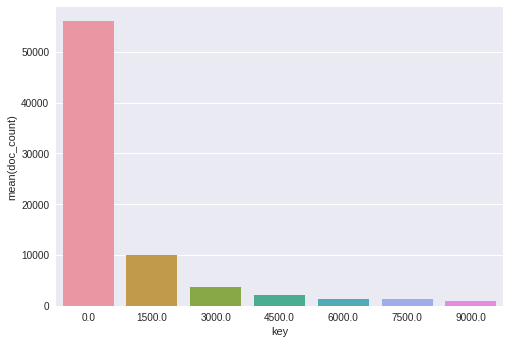

,doc_count,key
0,56056,0.0
1,10065,1500.0
2,3609,3000.0
3,2109,4500.0
4,1349,6000.0
5,1346,7500.0
6,1007,9000.0


In [258]:
###########################################
## HISTOGRAM AGGREGATION
###########################################
agg_name = "revenue_sum"
agg_type = "histogram"
field_name = "revenue"
num_of_buckets = 25
bins = 1500
min_doc_count = 1000

query_doc = {
    "aggs" : {
        agg_name: {
            agg_type : {
                "field" : field_name,
                "interval" : bins,
                 "min_doc_count" : min_doc_count
            }
        }
    }
}

res = es.search(index=INDEX, body=query_doc)
# Converting this list of dictionaries into a dataframe
df = pd.DataFrame(res['aggregations'][agg_name]['buckets'])

sns.barplot(x=df.key, y=df.doc_count)
_  = plt.show()

df.head(30)

In [268]:
#############################
## VALUE COUNT AGGREGATION
#############################
agg_name = "Value Count"
agg_type = "value_count"
field_name = "City"
searchcity ="Surat"


 
query = {
    "size": 3,
     "query" : {
        "constant_score" : {
            "filter" : {
                "match" : { "City" : searchcity }
            }
        }
    },
    
    "_source" : ["discount_percentage","total_discount_revenue" ],
    "aggs" : {
        agg_name : { agg_type : { "field" : field_name } }
    }
}


res = es.search(index=INDEX, body=json.dumps(query))
print(json.dumps(res, indent=4))

{
    "aggregations":{
        "Value Count":{
            "value":3978
        }
    },
    "_shards":{
        "total":5,
        "failed":0,
        "successful":5
    },
    "took":1,
    "timed_out":false,
    "hits":{
        "hits":[
            {
                "_source":{
                    "discount_percentage":19,
                    "total_discount_revenue":5510.76
                },
                "_type":"user",
                "_score":1.0,
                "_id":"e0ac01a1-6772-b40f-1da1-d0f481b3eec3",
                "_index":"eda_new"
            },
            {
                "_source":{
                    "discount_percentage":13,
                    "total_discount_revenue":5670.47
                },
                "_type":"user",
                "_score":1.0,
                "_id":"07419983-caa3-d6b6-dd2d-54e775795787",
                "_index":"eda_new"
            },
            {
                "_source":{
                    "discount_percentage":17,
   

In [280]:
#############################
## RANDOM AGGREGATION
#############################

query_doc={
  "query": {
    "function_score" : {
      "query" : { "match_phrase": {"name":"Samuel"} },
      "random_score" : { "seed" : 3 }
    }
  }
}


res = es.search(index=INDEX, body=json.dumps(query_doc)) 
print("Total records found: {rec}".format(rec=res['hits']['total']))
for x in range(0, res['hits']['total']):
    print("\n" + str(x+1))
    for key, value in res['hits']['hits'][x]['_source'].items():
        print(str(key) + ": " + str(value))
    if x == 1:
        print("-- breaking--")
        break 


Total records found: 199

1
discount_percentage: 15
total_discount_revenue: 117.15
num_of_orders: 1
r_score: 6
m_score: 2
Avg Order Value: 781.0
segments: []
City: Kolkata
days_since_last_purchase: 33
email_unsubscribe: False
name: Samuel Henry
rfm_score: 8
lifecycle: One time (Sleeping)
f_score: 0
revenue: 781

2
discount_percentage: 16
total_discount_revenue: 164.48
num_of_orders: 1
r_score: 5
m_score: 2
Avg Order Value: 1028.0
segments: []
City: Patna
days_since_last_purchase: 48
email_unsubscribe: False
name: Samuel Perry
rfm_score: 7
lifecycle: One time (Sleeping)
f_score: 0
revenue: 1028
-- breaking--
